<a href="https://colab.research.google.com/github/arahmanmdmajid/DS_AI_11/blob/main/Deep_Learning_Module_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/Deep Learning/Higgs Boson training.csv')

In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/Deep Learning/Higgs Boson test.csv')

In [4]:
df_test.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [5]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [7]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [8]:
df.shape

(250000, 33)

In [9]:
df.isnull().sum()

,0
EventId,0
DER_mass_MMC,0
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltaeta_jet_jet,0
DER_mass_jet_jet,0
DER_prodeta_jet_jet,0
DER_deltar_tau_lep,0
DER_pt_tot,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
EventId,0
DER_mass_MMC,0
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltaeta_jet_jet,0
DER_mass_jet_jet,0
DER_prodeta_jet_jet,0
DER_deltar_tau_lep,0
DER_pt_tot,0


In [12]:
df_continuous = df.drop(['EventId', 'Label'], axis=1)

In [13]:
df_continuous.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333


In [14]:
X = df_continuous
y = df['Label']

In [15]:
X.shape, y.shape

((250000, 31), (250000,))

In [16]:
y.value_counts()

,count
Label,
b,164333
s,85667


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[ 0.46141372,  0.06833197,  0.40768027, ...,  1.55858439,
         0.4125105 , -0.87681426],
       [ 0.51670419,  0.55250482,  0.54013641, ..., -0.63936694,
        -0.27381996,  0.31295252],
       [-2.33785898,  3.19515553,  1.09655998, ..., -0.63936694,
        -0.29396985,  0.37364501],
       ...,
       [ 0.38016991,  0.31931645, -0.13086367, ..., -0.63936694,
        -0.31701723, -0.86829055],
       [ 0.35431502, -0.84532397, -0.30297338, ..., -0.63936694,
        -0.74543941,  0.01858253],
       [-2.33785898,  0.66533608, -0.25352276, ..., -0.63936694,
        -0.74543941,  0.12303692]])

In [19]:
# Train/validation/test split (e.g., 70/15/15)
# Spliting into train and temp that will be further split into validation and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Spliting temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp) # 0.5 of 0.3 is 0.15

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (175000, 31)
Validation set shape: (37500, 31)
Test set shape: (37500, 31)


In [20]:
# Defining model architecture
model = Sequential([
  Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  BatchNormalization(),
  Dropout(0.3),
  Dense(64, activation='relu'),
  BatchNormalization(),
  Dropout(0.3),
  Dense(32, activation='relu'),
  BatchNormalization(),
  Dropout(0.3),
  Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
optimizer = Adam(learning_rate=0.001)

In [22]:
# Compiling model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 14,913 (58.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

In [25]:
# Trainig the model
# Converting string labels to numerical labels
y_train_numeric = y_train.replace({'s': 1, 'b': 0})
y_val_numeric = y_val.replace({'s': 1, 'b': 0})

history = model.fit(X_train, y_train_numeric,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val_numeric),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.7006 - loss: 0.5771 - val_accuracy: 0.8918 - val_loss: 0.2657 - learning_rate: 0.0010
Epoch 2/20
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8396 - loss: 0.3526 - val_accuracy: 0.9230 - val_loss: 0.1986 - learning_rate: 0.0010
Epoch 3/20
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8836 - loss: 0.2720 - val_accuracy: 0.8593 - val_loss: 0.4273 - learning_rate: 0.0010
Epoch 4/20
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8785 - loss: 0.2809 - val_accuracy: 0.9323 - val_loss: 0.1747 - learning_rate: 0.0010
Epoch 5/20
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8912 - loss: 0.2591 - val_accuracy: 0.9297 - val_loss: 0.1830 - learning_rate: 0.0010
Epoch 6/20
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.8913 - loss: 0.2521 - val_accuracy: 0.9423 - val_loss: 0.1774 - learning_rate: 0.0010
Epoch 7/20
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.9

In [28]:
# Evaluating the model on the test set
# Convert string labels to numerical labels
y_test_numeric = y_test.replace({'s': 1, 'b': 0})

loss, accuracy = model.evaluate(X_test, y_test_numeric)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

  67/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.1174

/tmp/ipython-input-28-388206779.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numeric = y_test.replace({'s': 1, 'b': 0})


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9585 - loss: 0.1151
Test Loss: 0.1131
Test Accuracy: 0.9596


In [29]:
def plot_training_curves(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot
    axs[0].plot(history.history['accuracy'], label='Train Acc')
    axs[0].plot(history.history['val_accuracy'], label='Val Acc')
    axs[0].set_title('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Val Loss')
    axs[1].set_title('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

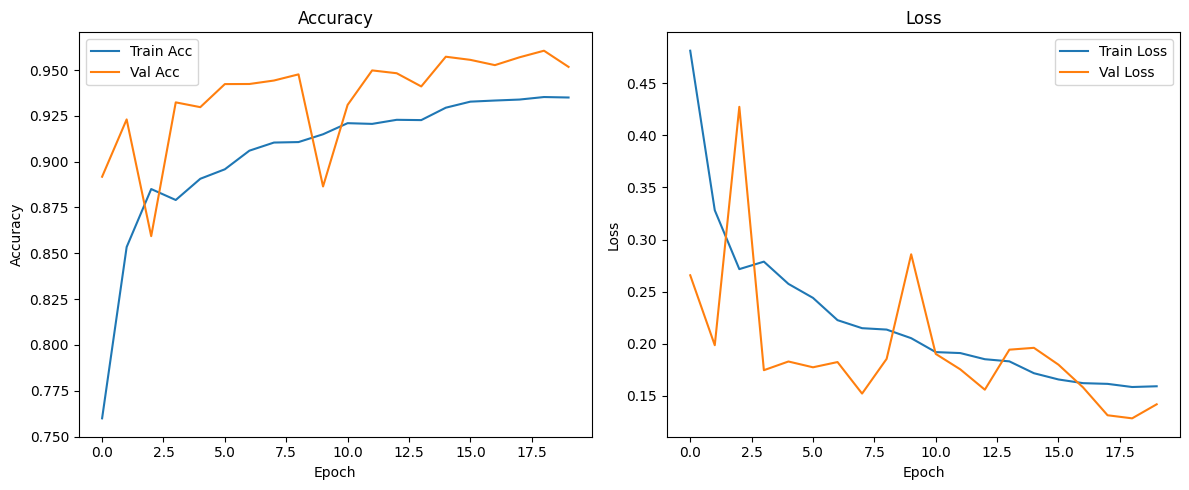

In [30]:
plot_training_curves(history)

In [34]:
# Predict probabilities on the test set
y_pred_proba = model.predict(X_test)
# Predict class labels on the test set (threshold is 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# Report performance metrics
print("\n--- Performance Metrics on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test_numeric, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_numeric, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_numeric, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_numeric, y_pred):.4f}")

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

--- Performance Metrics on Test Set ---
Accuracy: 0.9596
Precision: 0.9267
Recall: 0.9579
F1 Score: 0.9421


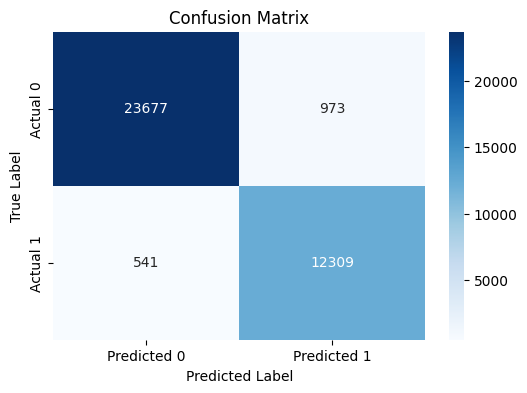

In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_numeric, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 4. Reflection (Summary)

* **Model Depth & Activation:**
  Deeper models can learn complex patterns but risk overfitting with limited data. Non-linear activations like ReLU enable the model to get better results.

* **Overfitting Mitigation:**
  Techniques such as dropout, batch normalization, and early stopping helped reduce overfitting.

* **Learning Rate & Optimizer:**
  The Adam optimizer with an initial learning rate of 0.001 and `ReduceLROnPlateau` gave good results.

* **Future Improvements:**
  With more resources, the model could benefit from thorough hyperparameter tuning, improved feature engineering, testing more complex models and exploring alternative architectures.
